In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

# Building A Neural Network Image Classifier

## Load Data

Load the fashion MNIST data set.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

Get train and test data.

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Plot sample training item.

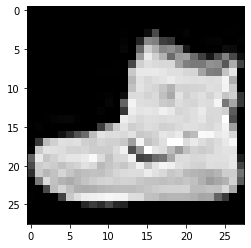

In [4]:
plt.imshow(X_train_full[0], cmap='gray', vmin=0, vmax=255)
plt.show()

This is clearly a boot.

## Pre-process Data

Need to standard scale all arrays (normally they are between 0 and 255) since we are using gradient descent.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Class names

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Create Simple Neural Network

### Step 1: Create

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Here's the model broken down:

* First line creates a sequential neural network; the simplest keras model for a neural network
* Second line converts images to 1d array (nice keras trick!)
* Third line creates a layer of 300 neurons with ReLu activation function.
* Fourth same as above.
* Fifth line uses softmax activation function because classes are exclusive. Recall softmax ensures all estimated probs are between 0 and 1 and add to 1.

Each dense layer manages its own weight matrix ($m \times n$ where m is number of nodes in prev layer and $n$ is nodes in current layer).

Simpler way to create (add all at once). Clear session to remove all layers from memory.

In [8]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") ])

Can look at characteristics of model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Lots of parameters! (All different weights and biases). Runs risk of overfitting (this will be discussed later).

Can also get models layers individually

In [10]:
model.layers

Can see they are pointers below:

In [11]:
hidden1 = model.layers[1]
model.get_layer('dense') is hidden1

True

All weights and biases can be accessed by get_weights() and set_weights() functions.

In [12]:
weights, biases = hidden1.get_weights()

In [13]:
weights

array([[-0.05217836,  0.00034952, -0.00581475, ..., -0.03740284,
         0.02256869, -0.02460666],
       [ 0.04892647, -0.01440887,  0.07379808, ..., -0.01301462,
         0.05633049, -0.00826426],
       [-0.00256055,  0.02423294,  0.03962078, ..., -0.04258351,
         0.06040707, -0.01803197],
       ...,
       [ 0.02973469,  0.03956594,  0.04389762, ..., -0.0476009 ,
        -0.01866946, -0.00376211],
       [ 0.00160079,  0.049686  , -0.00466605, ..., -0.01367878,
        -0.02970477,  0.03388193],
       [-0.05746673,  0.01671176,  0.03668912, ..., -0.04730537,
         0.02885594,  0.041481  ]], dtype=float32)

Note weights and biases are initiated randomly to break symmetry (need break and symmetry so not all weights evolve the same way).

### Step 2: Compile

Specify loss function in this step, optimizer, and metric.

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

Explained:
* sparse_categorical_crossentropy is used because we have sparse index and the classes are exclusive. If instead we had one target probability per class per instance (i.e returns something like [0.3, 0.2, ...]) then would use categorical_cross_entropy. Binary would use sigmoid function in ourput layer instead of softmax and would use binary_crossentropy as loss function.

* SGD is the regular stochastic gradient descent procedure. More efficient optimizers will be used in later chapters. Usually it is good to specify learning rate, so one would use the command "optimizer=keras.optimizer.SGD(lr=??)" instead of "optimizer='sgd'".

* Metric is used after the fact to evaluate how good the model is (not used during training). Can put as many different metrics as you want.

### Step 3: Train and Evaluate

#### Train

Train the model is simple. We pass a validation set (this is optional: but the model will evaluate the loss and accuracy on this validation set after each epoch).

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.7283 - accuracy: 0.7631 - val_loss: 0.5218 - val_accuracy: 0.8206
Epoch 2/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4908 - accuracy: 0.8291 - val_loss: 0.4792 - val_accuracy: 0.8320
Epoch 3/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4443 - accuracy: 0.8450 - val_loss: 0.4278 - val_accuracy: 0.8526
Epoch 4/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4168 - accuracy: 0.8535 - val_loss: 0.4049 - val_accuracy: 0.8604
Epoch 5/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3968 - accuracy: 0.8611 - val_loss: 0.3867 - val_accuracy: 0.8676
Epoch 6/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3817 - accuracy: 0.8653 - val_loss: 0.3806 - val_accuracy: 0.8684
Epoch 7/30
55000/55000 [==============================] -

Training is done. Note tha tinstead of passing a validation set one could change the validation_split argument in the model (splits by percentage) as opposed to validation_data.

**If some classes are overrepresented then its useful to set the class_weight argument which would give larger weight to underrepresented classes. This is useful in the loss function.**

Lets look at what history contains.

In [16]:
pd.DataFrame(history.history).head()

loss  accuracy  val_loss  val_accuracy
0  0.728334  0.763145  0.521757        0.8206
1  0.490784  0.829127  0.479193        0.8320
2  0.444287  0.845036  0.427823        0.8526
3  0.416793  0.853509  0.404916        0.8604
4  0.396767  0.861109  0.386742        0.8676

Each row of the DataFrame above is a new epoch. Easy to plot.

Text(0.5, 0, 'Epoch')

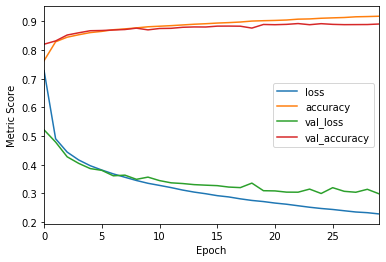

In [17]:
pd.DataFrame(history.history).plot()
plt.ylabel('Metric Score')
plt.xlabel('Epoch')

Clearly the loss functions decrease over time (good) and the user defined accuracy function increases (while these are not completely related, they are similar). Since the validation and normal curves are similar, there is not too much overfitting.

**Key Point**: Validation error computed at the end of each epoch, but training error is a running mean (so its essentially 'half-way' between epochs). Thus technically the training curve should be shifted to the left by half an epoch.

One can keep training by calling the fit method again (tensorflow continues where you left off).

In [18]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2242 - accuracy: 0.9200 - val_loss: 0.3145 - val_accuracy: 0.8894
Epoch 2/5
55000/55000 [==============================] - 4s 67us/sample - loss: 0.2206 - accuracy: 0.9224 - val_loss: 0.2958 - val_accuracy: 0.8964
Epoch 3/5
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2176 - accuracy: 0.9216 - val_loss: 0.3073 - val_accuracy: 0.8940
Epoch 4/5
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2144 - accuracy: 0.9234 - val_loss: 0.2952 - val_accuracy: 0.8942
Epoch 5/5
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2101 - accuracy: 0.9252 - val_loss: 0.3078 - val_accuracy: 0.8866


Text(0.5, 0, 'Epoch')

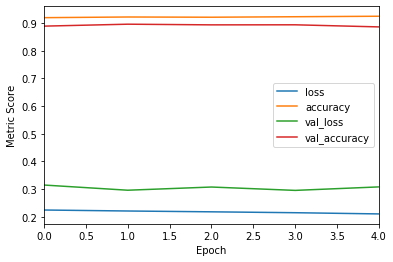

In [19]:
pd.DataFrame(history.history).plot()
plt.ylabel('Metric Score')
plt.xlabel('Epoch')

Since the accuracy isn't increasing by much, its likely the model has reached the optimal solution.

#### Evaluate

In [20]:
X_test = X_test / 255.0
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3422523136138916, 0.8784]

About 88% accuracy: not bad. Note that this is not the same as the validation set; there is no reason this should be so so its likely this is just bad luck. In the future, hyperparameters will actually be tuned based on validation set, so these differences will be expected.

Making precitions is simple.

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

These are probability arrays; each instance has one class that is far more probable than the others. If you don't care about probabilities then you can simply use the predict classes method.

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

These correspond to classes 9, 2, and 1 in the clothing name array.

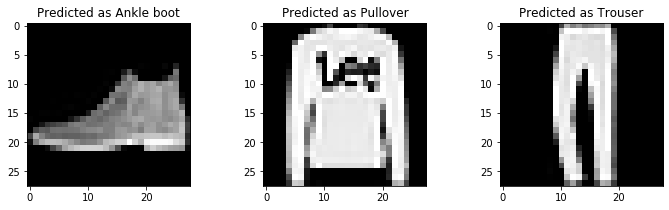

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_new[i], cmap='gray')
    ax[i].set_title('Predicted as {}'.format(class_names[y_pred[i]]))

These predictions are correct.

# Building a Regression MultiLayer-Perceptron Using Sequential API

In [24]:
housing = fetch_california_housing()

Get training, validation, and test set. Scale inputs using scaler.

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Define model.

* Output layer only has a single neuron since we are predicting a single variable. Also has no activation function (outputs $\sum w_i x_i$).

* Since data set is noisy only use a single layer with less neurons to prevent overfitting.

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

Compile model using mean squared error as loss function and stochastic gradient descent for updating weight values.

In [27]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

Fit the model and get history.

In [28]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 60us/sample - loss: 1.8592 - val_loss: 2.7669
Epoch 2/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.7325 - val_loss: 0.7029
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6615 - val_loss: 0.6093
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.6275 - val_loss: 0.5743
Epoch 5/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5990 - val_loss: 0.5484
Epoch 6/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5733 - val_loss: 0.5237
Epoch 7/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5513 - val_loss: 0.5044
Epoch 8/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5313 - val_loss: 0.4867
Epoch 9/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5141 - val_l

In [29]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

The loss is actually better! Now get predictions from model and relative differences

In [30]:
y_pred = model.predict(X_test)
relative_diff = np.abs(y_pred.reshape(-1)- y_test.reshape(-1)) /  y_test.reshape(-1)

Plot

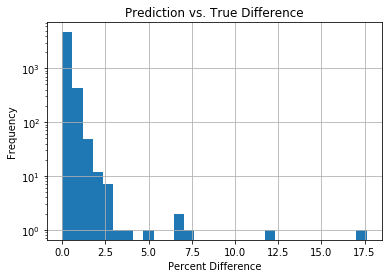

In [31]:
plt.hist(relative_diff, bins=30)
plt.yscale('log', nonposy='clip')
plt.ylabel('Frequency')
plt.xlabel('Percent Difference')
plt.title('Prediction vs. True Difference')
plt.grid()

# Complex Models Using Functional API

## Stacking Layers in Non-Sequential Manner

Wide and deep neural networks: normal sequential network except all inputs **are also** connected to the output layer as well. Why?

* Inputs connected to output layer allow for simple patterns to be learned
* Still have the deep network to allow for deeper patterns to be learned

These can be created using the functional API as follows

In [32]:
keras.backend.clear_session()

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

Note that when we create layers in this fashion, we connect the previous layer using the argument at the end.

We could also connect **some** of the input features to the deep network and **some** of the input features straight to the output. This is done by breaking up the input features.

In [34]:
keras.backend.clear_session()

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

The annoying part is we then have to break apart the training set when calling fit.

In [36]:
## First Compile
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

## Break apart training set into two diff paths
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

## Fit model and get predictions
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_test_A, X_test_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 68us/sample - loss: 2.3578 - val_loss: 1.8299
Epoch 2/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.8928 - val_loss: 0.7400
Epoch 3/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6859 - val_loss: 0.6043
Epoch 4/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.6057 - val_loss: 0.6124
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5619 - val_loss: 0.5802
Epoch 6/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5316 - val_loss: 0.4987
Epoch 7/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5109 - val_loss: 0.5006
Epoch 8/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4949 - val_loss: 0.4784
Epoch 9/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4825 - val_l

## Multiple Outputs

Many cases you might want this

* Prediction is 2d (ie coordinates)
* Multiple tasks with same data. You could train 2 neural networks, but usually it is better to train one, since you can learn features in the data that are similar across tasks. This gets in **multitask classification** on pictures, when you might want to classify thei faciual expression *and* whether or not they';re wearing glasses.
* **Important Case**: Might want to add auxilary outputs in the architecture to ensure that each layer is actually learning something useful on its own (might want to skip the last layer, for example, and compare outputs).

The following is the same as the code above, except it adds an auxillary layer before concat (only studies features of input B): see fig 10-16.

In [37]:
keras.backend.clear_session()

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

## Output Layer Stuff
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

We need a seperate loss function for each output when compiling. We do this below. The **loss weights** will weight each loss when computing the total loss of the neural network (it cares much more about the main output than the auxillary one).

In [39]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9,0.1], optimizer="sgd")

Now fit the model and provide labels for each output. We need to provide the y_train and y_valid twice; one for each output.

In [40]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.8558 - main_output_loss: 0.7499 - aux_output_loss: 1.8097 - val_loss: 2.0341 - val_main_output_loss: 2.0414 - val_aux_output_loss: 1.9590
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5424 - main_output_loss: 0.4949 - aux_output_loss: 0.9693 - val_loss: 2.1985 - val_main_output_loss: 2.2498 - val_aux_output_loss: 1.7264
Epoch 3/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4941 - main_output_loss: 0.4598 - aux_output_loss: 0.8010 - val_loss: 0.5461 - val_main_output_loss: 0.5240 - val_aux_output_loss: 0.7427
Epoch 4/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4522 - main_output_loss: 0.4253 - aux_output_loss: 0.6947 - val_loss: 0.4189 - val_main_output_loss: 0.3906 - val_aux_output_loss: 0.6722
Epoch 5/20
11610/11610 [==============================] - 1s 46us/s

Lets compare the predictions.

In [41]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

NameError: name 'X_new_A' is not defined

In [42]:
main_loss

0.33991835

In [43]:
aux_loss

0.45923227

Note the main loss is greater than the aux loss. Can also examine during training:

(0.23559936434030532, 2)

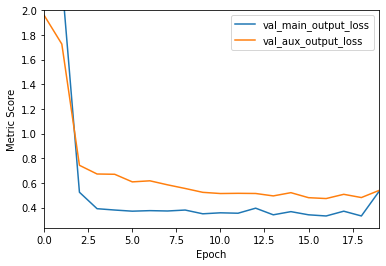

In [44]:
df = pd.DataFrame(history.history)[['val_main_output_loss', 'val_aux_output_loss']]
df.plot()
plt.ylabel('Metric Score')
plt.xlabel('Epoch')
plt.ylim(top=2)

Clearly the auxillary output is not performing as well, so the other data really did matter.

# Dynamic Models Using Subclassing API

We have now examined the functional API and the sequential API. They are declarative: you start by declaring which layers to use and how they should be connected.

* Models like this can be easily saved, cloned, shared
* Models like this can be easily debugged

Problem: the model is static. If you want dynamic model (things changing over time) then you need to use the **subclassing API**. We briefly examine it here but it is discussed in further detail in Chapter 12.

To make the same model as above:

In [45]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)# handles standard args like name
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

# CODE YOU WOULD USE BELOW
# model = WideAndDeepModel(30, activation="relu")

It uses the keras.models.Model as a *super class* which provides all the required compile and fit methods required for training a model. The only new thing is the "call" function which will be studied in more depth in chapter 12.

# Saving and Loading Models

Saving

In [46]:
model.save("my_keras_model.h5")

It is good practice to save the model during checkpoints of training if the training lasts several hours. You can do this by **using callbacks**.

Loading

In [47]:
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks

### Implementing Keras Callbacks

* The fit method has a "callbacks" argument that allows you to specify a list of objects Keras will call at the start and end of training, start and end of epoch, and start and even before and after processing each batch. 
* The keras.callbacks.ModelCheckpoint() method will save the model.

The code below creates a model, compiles it, fits it, then afterwards loads the best model during training.

In [48]:
%%capture

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

In [49]:
mse_test

0.45257103928299836

You can also implement early stopping when no progress is being made on the model. We can combine both callbacks to

* Stop model when no progress is being made
* Save best model

In [50]:
%%capture

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# Checkpoint and early stopping CALLBACK
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Run Model
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Can see not all 100 epochs were ran through:

In [51]:
len(history.history['loss'])

32

Can find more callbacks at https://keras.io/callbacks/

### Custom Callbacks

Can also customize your own callbacks. This is done by creating a class with proper formatting:

In [52]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

This will print the ratio of validation loss to normal loss.

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# Custom CALLBACK
val_train_ratio_cb = PrintValTrainRatioCallback()

# Run Model
history = model.fit(X_train, y_train, epochs=4,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/4
10528/11610 [==========================>...] - ETA: 0s - loss: 2.0827
val/train: 6.23
11610/11610 [==============================] - 1s 64us/sample - loss: 1.9778 - val_loss: 12.3132
Epoch 2/4
11136/11610 [===========================>..] - ETA: 0s - loss: 0.8610
val/train: 3.45
11610/11610 [==============================] - 0s 41us/sample - loss: 0.8514 - val_loss: 2.9385
Epoch 3/4
11264/11610 [============================>.] - ETA: 0s - loss: 0.7095
val/train: 0.91
11610/11610 [==============================] - 0s 41us/sample - loss: 0.7102 - val_loss: 0.6472
Epoch 4/4
11520/11610 [============================>.] - ETA: 0s - loss: 0.6409
val/train: 0.94
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6403 - val_loss: 0.6019


Note how the ratio is printed. Of course, this ratio could just be plotted later with the DataFrame; this is just showing off what custom callbacks can do.

# Using TensorBoard for Visualization

First need to define a log directory for TensorBoard logs.

In [57]:
root_logdir=os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

Now train a model and use the tensorboard callback.

In [59]:
%%capture

keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# TensorBoard CALLBACK
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# Run Model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Load tensorboard in jupyter shell.

In [62]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 9932), started 0:08:39 ago. (Use '!kill 9932' to kill it.)

# Fine-Tuning Neural Network Parameters

The easiest way to do this is to createa function to build a model and then pass it into the sci-kit learn functionality. The function takes in all the hyperparameters.

In [68]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Now we wrap it using a special scikit_learn wrapper

In [70]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

This allows it to be used like any of the regular scikit learn models.

In [71]:
%%capture
keras_reg.fit(X_train, y_train, epochs=30,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Can use the "score" and "predict" functions as normal with scikit learn. Important part: can use GridSearch and RandomizedSearch. This can take AWHILE, even for simple networks like this.

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 73us/sample - loss: 3.5564 - val_loss: 1.8584
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.3350 - val_loss: 0.9421
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.8579 - val_loss: 0.7273
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7340 - val_loss: 0.9321
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6951 - val_loss: 0.6364
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6682 - val_loss: 0.8188
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6526 - val_loss: 0.7451
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6386 - val_loss: 0.6280
Epoch 9/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6251 - val_loss: 0.6979
Epoch 10/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=  10.1s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s


7740/7740 [==============================] - 1s 100us/sample - loss: 3.5557 - val_loss: 23.2477
Epoch 2/100
7740/7740 [==============================] - 0s 51us/sample - loss: 1.4772 - val_loss: 10.8630
Epoch 3/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.0155 - val_loss: 4.4730
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.8734 - val_loss: 1.5265
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.8032 - val_loss: 0.7206
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7550 - val_loss: 1.1635
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7167 - val_loss: 2.4032
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6855 - val_loss: 4.0540
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6591 - val_loss: 5.9448
Epoch 10/100
7740/7740 [==============================]

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   5.8s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 70us/sample - loss: 3.2689 - val_loss: 1.3818
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.9650 - val_loss: 0.7308
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6171 - val_loss: 0.5392
Epoch 4/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5491 - val_loss: 0.5124
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5355 - val_loss: 0.5908
Epoch 6/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5310 - val_loss: 0.7897
Epoch 7/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5344 - val_loss: 0.5654
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   5.6s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 75us/sample - loss: 1.4462 - val_loss: 5.1308
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6498 - val_loss: 12.7918
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6009 - val_loss: 0.5573
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5603 - val_loss: 2.6121
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6319 - val_loss: 151.6779
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.7132 - val_loss: 528.7355
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 6.1401 - val_loss: 2334.6791
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   4.9s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 82us/sample - loss: 1.1692 - val_loss: 23.5191
Epoch 2/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5356 - val_loss: 22.9158
Epoch 3/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5234 - val_loss: 22.1786
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5157 - val_loss: 22.7104
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5119 - val_loss: 19.5439
Epoch 6/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5085 - val_loss: 17.4588
Epoch 7/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5065 - val_loss: 19.9278
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   6.2s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 1.4012 - val_loss: 22.6568
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.8933 - val_loss: 74.3529
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6764 - val_loss: 35.7059
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.8437 - val_loss: 237.3450
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 3.7140 - val_loss: 400.4507
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 11.2961 - val_loss: 689.5318
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 3.4443 - val_loss: 1111.7923
Epoch 8/100
7740/7740 [=====================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   4.3s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 80us/sample - loss: 2.4633 - val_loss: 5.9456
Epoch 2/100
7740/7740 [==============================] - 0s 49us/sample - loss: 1.1215 - val_loss: 1.4347
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.8125 - val_loss: 0.8367
Epoch 4/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.7208 - val_loss: 0.6798
Epoch 5/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6788 - val_loss: 0.6425
Epoch 6/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.6498 - val_loss: 0.6208
Epoch 7/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6262 - val_loss: 0.5985
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3535 - val_loss: 0.3577
Epoch 77/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3528 - val_loss: 0.3833
Epoch 78/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3522 - val_loss: 0.3699
Epoch 79/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3517 - val_loss: 0.3741
Epoch 80/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3510 - val_loss: 0.3822
Epoch 81/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3505 - val_loss: 0.3607
Epoch 82/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3498 - val_loss: 0.3636
Epoch 83/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3494 - val_loss: 0.3599
Epoch 84/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3487 - val_loss: 0.3708
3870/1 [=============================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  31.5s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 81us/sample - loss: 2.7684 - val_loss: 18.4083
Epoch 2/100
7740/7740 [==============================] - 0s 46us/sample - loss: 1.1143 - val_loss: 15.3327
Epoch 3/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.8059 - val_loss: 11.0646
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.7051 - val_loss: 8.1682
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6574 - val_loss: 6.1023
Epoch 6/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6258 - val_loss: 4.6822
Epoch 7/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.6006 - val_loss: 3.6827
Epoch 8/100
7740/7740 [==============================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  14.2s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 80us/sample - loss: 2.8290 - val_loss: 4.4146
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 1.1367 - val_loss: 1.1500
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.8424 - val_loss: 0.8068
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7625 - val_loss: 0.7274
Epoch 5/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.7218 - val_loss: 0.6908
Epoch 6/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6927 - val_loss: 0.6563
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6683 - val_loss: 0.6336
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3668 - val_loss: 0.3799
Epoch 77/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3662 - val_loss: 0.3792
Epoch 78/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3657 - val_loss: 0.3892
Epoch 79/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3652 - val_loss: 0.3812
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3646 - val_loss: 0.3764
Epoch 81/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3639 - val_loss: 0.3870
3870/1 [==============================================================================================================================================================================================================================================================================================================================================================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  30.7s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 100us/sample - loss: 2.3816 - val_loss: 14.5443
Epoch 2/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.2100 - val_loss: 5.8430
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.9043 - val_loss: 4.3275
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.8113 - val_loss: 3.4674
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.7714 - val_loss: 2.7485
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7425 - val_loss: 2.3965
Epoch 7/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.7204 - val_loss: 2.1100
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=  27.1s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 84us/sample - loss: 3.7588 - val_loss: 28.7992
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 2.0541 - val_loss: 42.6182
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 1.6147 - val_loss: 37.3708
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.3635 - val_loss: 28.7112
Epoch 5/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.1710 - val_loss: 20.3691
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.0281 - val_loss: 14.3878
Epoch 7/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.9283 - val_loss: 10.6283
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=  11.6s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 83us/sample - loss: 2.9155 - val_loss: 4.8947
Epoch 2/100
7740/7740 [==============================] - 0s 52us/sample - loss: 1.2940 - val_loss: 3.0524
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.9739 - val_loss: 1.9077
Epoch 4/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.8515 - val_loss: 1.3465
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.7859 - val_loss: 0.9787
Epoch 6/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.7436 - val_loss: 0.7981
Epoch 7/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.7132 - val_loss: 0.7103
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4062 - val_loss: 0.4283
Epoch 77/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4055 - val_loss: 0.4248
Epoch 78/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4047 - val_loss: 0.4279
Epoch 79/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4041 - val_loss: 0.4235
Epoch 80/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4033 - val_loss: 0.4187
Epoch 81/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4025 - val_loss: 0.4228
Epoch 82/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4019 - val_loss: 0.4225
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4011 - val_loss: 0.4265
Epoch 84/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4005 - val_loss: 0.4278
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=  37.2s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 89us/sample - loss: 2.1242 - val_loss: 27.5149
Epoch 2/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.0018 - val_loss: 131.2478
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.4620 - val_loss: 194.3883
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 4.2615 - val_loss: 400.2876
Epoch 5/100
7740/7740 [==============================] - 0s 50us/sample - loss: 2.5354 - val_loss: 686.7763
Epoch 6/100
7740/7740 [==============================] - 0s 46us/sample - loss: 8.5730 - val_loss: 1577.7325
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 13.6798 - val_loss: 3490.3959
Epoch 8/100
7740/7740 [=================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   4.4s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 73us/sample - loss: 1.4717 - val_loss: 13.8555
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5772 - val_loss: 17.0246
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5518 - val_loss: 18.8021
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5369 - val_loss: 20.2835
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5277 - val_loss: 19.3474
Epoch 6/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5205 - val_loss: 18.4462
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5158 - val_loss: 19.6960
Epoch 8/100
7740/7740 [============================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   4.2s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 1.9040 - val_loss: 1.7294
Epoch 2/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5866 - val_loss: 0.8622
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6039 - val_loss: 12.8725
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5834 - val_loss: 1.4582
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6221 - val_loss: 3.3088
Epoch 6/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5511 - val_loss: 11.6689
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7116 - val_loss: 29.9577
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   4.5s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 1.2466 - val_loss: 39.3874
Epoch 2/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.9034 - val_loss: 356.6109
Epoch 3/100
7740/7740 [==============================] - 0s 48us/sample - loss: 1.9792 - val_loss: 0.7164
Epoch 4/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4649 - val_loss: 0.4108
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4134 - val_loss: 1.0029
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3971 - val_loss: 1.1990
Epoch 7/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4032 - val_loss: 5.3809
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   7.6s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.8880 - val_loss: 2.6958
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5231 - val_loss: 0.4678
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4631 - val_loss: 0.4749
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4359 - val_loss: 0.4024
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4209 - val_loss: 0.4751
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4118 - val_loss: 0.4977
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4057 - val_loss: 0.7345
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   5.3s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 75us/sample - loss: 1.1476 - val_loss: 19.1236
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6004 - val_loss: 43.3496
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6625 - val_loss: 23.9919
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6275 - val_loss: 2.5008
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4657 - val_loss: 0.4522
Epoch 6/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4227 - val_loss: 0.4120
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4121 - val_loss: 0.3991
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  20.9s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 86us/sample - loss: 4.0154 - val_loss: 8.4338
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 2.3190 - val_loss: 7.3895
Epoch 3/100
7740/7740 [==============================] - 0s 49us/sample - loss: 1.6395 - val_loss: 5.5681
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.3384 - val_loss: 4.1801
Epoch 5/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.1802 - val_loss: 2.6829
Epoch 6/100
7740/7740 [==============================] - 0s 50us/sample - loss: 1.0684 - val_loss: 2.1789
Epoch 7/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.9882 - val_loss: 1.7644
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4173 - val_loss: 0.4059
Epoch 77/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4156 - val_loss: 0.4041
Epoch 78/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4139 - val_loss: 0.4025
Epoch 79/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4123 - val_loss: 0.4010
Epoch 80/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4107 - val_loss: 0.4001
Epoch 81/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4092 - val_loss: 0.3988
Epoch 82/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4076 - val_loss: 0.3986
Epoch 83/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4063 - val_loss: 0.3969
Epoch 84/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4048 - val_loss: 0.3948
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  37.2s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 84us/sample - loss: 5.0627 - val_loss: 2.9619
Epoch 2/100
7740/7740 [==============================] - 0s 47us/sample - loss: 2.1420 - val_loss: 5.9065
Epoch 3/100
7740/7740 [==============================] - 0s 48us/sample - loss: 1.2787 - val_loss: 10.6548
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.0909 - val_loss: 11.2295
Epoch 5/100
7740/7740 [==============================] - 0s 48us/sample - loss: 1.0057 - val_loss: 9.7659
Epoch 6/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.9450 - val_loss: 7.9557
Epoch 7/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.8984 - val_loss: 6.5072
Epoch 8/100
7740/7740 [==============================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  10.1s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 90us/sample - loss: 4.4054 - val_loss: 3.5453
Epoch 2/100
7740/7740 [==============================] - 0s 49us/sample - loss: 2.5632 - val_loss: 3.0304
Epoch 3/100
7740/7740 [==============================] - 0s 48us/sample - loss: 1.4056 - val_loss: 2.5104
Epoch 4/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.9829 - val_loss: 1.7405
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.8388 - val_loss: 1.2852
Epoch 6/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.7690 - val_loss: 0.9827
Epoch 7/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.7274 - val_loss: 0.8182
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  21.3s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 74us/sample - loss: 1.4786 - val_loss: 32.2154
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.8372 - val_loss: 0.6056
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5351 - val_loss: 0.4733
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4868 - val_loss: 0.4441
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4613 - val_loss: 0.4300
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4455 - val_loss: 0.4229
Epoch 7/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4345 - val_loss: 0.4182
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=   6.6s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 76us/sample - loss: 1.2435 - val_loss: 0.6645
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5790 - val_loss: 0.9961
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5141 - val_loss: 1.4106
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4821 - val_loss: 1.3241
Epoch 5/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4607 - val_loss: 1.1473
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4442 - val_loss: 0.7063
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4326 - val_loss: 0.5003
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=   7.5s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 76us/sample - loss: 1.7713 - val_loss: 42.9949
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.8447 - val_loss: 0.5217
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5263 - val_loss: 0.4754
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4931 - val_loss: 0.4464
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4720 - val_loss: 0.4311
Epoch 6/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4583 - val_loss: 0.4217
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4483 - val_loss: 0.4149
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3547 - val_loss: 0.3506
Epoch 77/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3581 - val_loss: 0.3511
Epoch 78/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3544 - val_loss: 0.3502
Epoch 79/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3533 - val_loss: 0.3507
Epoch 80/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3532 - val_loss: 0.3487
Epoch 81/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3560 - val_loss: 0.3511
Epoch 82/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3523 - val_loss: 0.3490
Epoch 83/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3510 - val_loss: 0.3586
Epoch 84/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3508 - val_loss: 0.3584
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  36.3s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 71us/sample - loss: 7.7183 - val_loss: 42.9974
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 5.5359 - val_loss: 27.4340
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 4.0708 - val_loss: 17.4759
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 3.0666 - val_loss: 11.0630
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 2.3733 - val_loss: 7.0741
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.8924 - val_loss: 4.5246
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.5539 - val_loss: 2.9484
Epoch 8/100
7740/7740 [==============================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   8.7s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 70us/sample - loss: 7.6322 - val_loss: 25.5267
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 5.6958 - val_loss: 23.8046
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 4.3254 - val_loss: 22.6027
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 3.3442 - val_loss: 21.7543
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 2.6354 - val_loss: 21.1529
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 2.1185 - val_loss: 20.7317
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.7388 - val_loss: 20.4422
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   7.9s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 91us/sample - loss: 6.1551 - val_loss: 7.6300
Epoch 2/100
7740/7740 [==============================] - 0s 47us/sample - loss: 4.4875 - val_loss: 4.9071
Epoch 3/100
7740/7740 [==============================] - 0s 43us/sample - loss: 3.3694 - val_loss: 3.3167
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 2.6034 - val_loss: 2.3629
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 2.0678 - val_loss: 1.7850
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.6876 - val_loss: 1.4380
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.4151 - val_loss: 1.2333
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   9.3s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 80us/sample - loss: 1.3428 - val_loss: 6.6633
Epoch 2/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6725 - val_loss: 27.2674
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7856 - val_loss: 3.9609
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5327 - val_loss: 0.4810
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4455 - val_loss: 0.4217
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4260 - val_loss: 0.4048
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4130 - val_loss: 0.4006
Epoch 8/100
7740/7740 [==============================] 

Epoch 76/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3026 - val_loss: 0.3096
Epoch 77/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3017 - val_loss: 0.3805
Epoch 78/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3014 - val_loss: 0.3021
Epoch 79/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3001 - val_loss: 0.3182
Epoch 80/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2999 - val_loss: 0.3000
Epoch 81/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2994 - val_loss: 0.3013
Epoch 82/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.2986 - val_loss: 0.3015
3870/1 [===================================================================================================================================================================================================================================================

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  30.6s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 85us/sample - loss: 1.1929 - val_loss: 0.8355
Epoch 2/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6051 - val_loss: 0.8527
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5373 - val_loss: 1.2540
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4919 - val_loss: 1.2976
Epoch 5/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4619 - val_loss: 0.9909
Epoch 6/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4408 - val_loss: 0.6783
Epoch 7/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4267 - val_loss: 0.4828
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=   7.2s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.1250 - val_loss: 3.1401
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.7007 - val_loss: 2.5360
Epoch 3/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5930 - val_loss: 0.9527
Epoch 4/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5268 - val_loss: 0.8469
Epoch 5/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4832 - val_loss: 0.4355
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4538 - val_loss: 0.4917
Epoch 7/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4367 - val_loss: 0.4116
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  13.8s
Train on 11610 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.2min finished


11610/11610 [==============================] - 1s 64us/sample - loss: 1.0548 - val_loss: 7.1215
Epoch 2/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5853 - val_loss: 1.0342
Epoch 3/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4798 - val_loss: 0.4458
Epoch 4/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4378 - val_loss: 0.4292
Epoch 5/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4161 - val_loss: 0.4016
Epoch 6/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4000 - val_loss: 0.4342
Epoch 7/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3915 - val_loss: 0.3788
Epoch 8/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3822 - val_loss: 0.4319
Epoch 9/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3781 - val_loss: 0.4360
Epoch 10/100
11610/11610 [==============

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000024F340616D8>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024F3451A860>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [75]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

There are other better ways to optimize hyperparameters: see pg 322 and 323 for list of useful packages.

# Reasonable Hyperparameter Values

## Hidden Layers

* One hidden layer can theoretically model the most complex problem, but deep networks have a higher parameter efficiency. This is because lower layers model low-level structures (line segments of various shape), mid level layers model intermediate level stuff (squares, circles) and high level layers model complex stuff like faces. It goes like a hierarchy.

* Can reuse lower levels of some networks to train on other networks (this is done for things like facial classification).This is called *transfer learning*.

* Typically good to ramp up hidden layers until you start overfitting.

## Neurons per Layer

* Typically good to have same number of neurons in all layers (reduces number of hyperparameters). However, some data sets benefit from having a larger first layer.

* Good practice to increase number of neurons per layer gradually until overfitting starts to occur.

* Trick: Start with a network of many layers and neurons then use early stopping and other regularization techniques to prevent overfitting.

## Learning Rate

* Good learning rate is half the maximum learning rate (where algorithm diverges). How to get this? Start low ($10^{-5}$) gradually increase to large ($10$) then plot loss as function of learning rate. Look at the inflection point, then choose a learning rate half as big.